In [1]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
from statsbombpy import sb
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import pandas as pd
import numpy as np

In [2]:
from scipy.spatial import ConvexHull, Voronoi, Delaunay

In [3]:
sb.competitions()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2021-04-11T22:02:53.549443,2021-04-11T22:02:53.549443
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [4]:
sb.matches(competition_id=16, season_id=1)

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,18245,2018-05-26,20:45:00.000,Europe - Champions League,2017/2018,Real Madrid,Liverpool,3,1,available,unscheduled,2021-01-23T21:55:30.425330,None,7,Final,NSK Olimpijs'kyj,M. Mažić,1.1.0,2,2


In [5]:
# We take this match number 18245
dict_event = read_event(f'{EVENT_SLUG}/18245.json', related_event_df=False, tactics_lineup_df=False, warn=False)
event = dict_event['event']
tracking = dict_event['shot_freeze_frame']

In [6]:
event

,match_id,id,index,period,timestamp_minute,timestamp_second,timestamp_millisecond,minute,second,type_id,...,injury_stoppage_in_chain,shot_statsbomb_xg,shot_key_pass_id,shot_first_time,shot_one_on_one,shot_redirect,substitution_replacement_id,substitution_replacement_name,tactics_formation,aerial_won
0,18245,5eee3ffd-f0c0-4532-868b-4a66cbf20cb8,1,1,0,0,0,0,0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41212.0,NaN
1,18245,eaa65a92-02d3-4375-b2b7-7c2f679a620c,2,1,0,0,0,0,0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433.0,NaN
2,18245,9c82d2e5-ebba-4825-b7f9-b11b04433ed8,3,1,0,0,0,0,0,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18245,b791047a-3eea-452f-b3a9-212bd40cd7cb,4,1,0,0,0,0,0,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18245,25be91a5-a084-42cb-8cc1-a0fe7b0f52f9,5,1,0,0,371,0,0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,18245,b4258521-d4ec-466d-a90c-e4522692a45b,3493,2,47,30,959,92,30,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3493,18245,37f51448-ebd1-4d67-8d9e-fa4b450111b2,3494,2,47,33,52,92,33,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3494,18245,e9f7bb50-f4fc-45aa-87d3-20bbe9ebd32f,3495,2,47,39,157,92,39,40,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3495,18245,ce7d446a-e8bf-4631-bcf5-2bd323ba251e,3496,2,48,2,893,93,2,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
event.type_name.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Ball Recovery', 'Pressure', 'Clearance', 'Foul Won',
       'Foul Committed', 'Miscontrol', 'Dispossessed', 'Duel',
       'Dribbled Past', 'Dribble', 'Block', 'Shot', 'Goal Keeper',
       'Interception', 'Error', '50/50', 'Injury Stoppage',
       'Substitution', 'Tactical Shift', 'Offside', 'Half End'],
      dtype=object)

In [8]:
tracking

,id,event_freeze_id,player_teammate,player_id,player_name,player_position_id,player_position_name,x,y,match_id
0,682270cc-4bc4-4952-8f91-d3c5a704a691,1,False,5463,Luka Modrić,13,Right Center Midfield,98.0,48.4,18245
1,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,1,True,3535,Roberto Firmino Barbosa de Oliveira,23,Center Forward,109.0,39.9,18245
2,399ac143-5f7b-4080-8c0b-3c18435d7fc1,1,True,3655,Andrew Robertson,6,Left Back,102.1,2.5,18245
3,660d9d98-46b6-4b5e-9c9a-435d63142c93,1,True,4926,Francisco Román Alarcón Suárez,19,Center Attacking Midfield,100.2,11.0,18245
4,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,1,True,3629,Sadio Mané,21,Left Wing,90.9,32.3,18245
...,...,...,...,...,...,...,...,...,...,...
356,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,16,False,5463,Luka Modrić,13,Right Center Midfield,99.9,19.0,18245
357,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,17,False,5463,Luka Modrić,13,Right Center Midfield,99.2,50.3,18245
358,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,17,False,5201,Sergio Ramos García,5,Left Center Back,114.1,42.9,18245
359,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,18,False,5574,Toni Kroos,15,Left Center Midfield,102.7,37.0,18245


In [9]:
tracking_1 = tracking[['id', 'x', 'y', 'player_teammate']]
tracking_1 = tracking_1.rename(columns={'player_teammate':'Team', 'id': 'Shot_id'})
tracking_1['Team'] *= 1
tracking_1

,Shot_id,x,y,Team
0,682270cc-4bc4-4952-8f91-d3c5a704a691,98.0,48.4,0
1,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,109.0,39.9,1
2,399ac143-5f7b-4080-8c0b-3c18435d7fc1,102.1,2.5,1
3,660d9d98-46b6-4b5e-9c9a-435d63142c93,100.2,11.0,1
4,fe6c7f60-2ff0-4077-882e-b045c8abc7c3,90.9,32.3,1
...,...,...,...,...
356,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,99.9,19.0,0
357,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,99.2,50.3,0
358,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,114.1,42.9,0
359,9f5aa3eb-3bed-4bc0-97a5-bb8444b235b9,102.7,37.0,0


In [10]:
# choose a particular Shot_id for capturing the particular moment of player positions when the shot was taken
shot = '18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80'

In [11]:
tracking_2 = tracking_1[tracking_1['Shot_id'] == shot].reset_index()
tracking_2

,index,Shot_id,x,y,Team
0,27,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,115.5,38.5,0
1,55,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,119.4,40.0,0
2,83,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,97.7,45.0,1
3,111,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,108.3,45.6,1
4,139,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,110.0,47.3,1
5,167,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,113.1,36.9,1
6,194,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,116.6,40.3,1
7,220,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,98.5,7.9,1
8,246,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,115.6,35.3,1
9,272,18f64bd1-c8a9-4f31-9e58-3ec7a1de0a80,103.9,42.4,0


In [12]:
tracking_3 = tracking_2[['x', 'y', 'Team']]
tracking_Real = tracking_3[tracking_3['Team']==0]
tracking_Liverpool = tracking_3[tracking_3['Team']==1]
tracking_Liverpool

,x,y,Team
2,97.7,45.0,1
3,108.3,45.6,1
4,110.0,47.3,1
5,113.1,36.9,1
6,116.6,40.3,1
7,98.5,7.9,1
8,115.6,35.3,1


In [13]:
tracking_2
tracking_3 = tracking_2[['x', 'y', 'Team']]
tracking_3

,x,y,Team
0,115.5,38.5,0
1,119.4,40.0,0
2,97.7,45.0,1
3,108.3,45.6,1
4,110.0,47.3,1
5,113.1,36.9,1
6,116.6,40.3,1
7,98.5,7.9,1
8,115.6,35.3,1
9,103.9,42.4,0


In [14]:
points = tracking_3[['x', 'y']].values
points

array([[115.5,  38.5],
       [119.4,  40. ],
       [ 97.7,  45. ],
       [108.3,  45.6],
       [110. ,  47.3],
       [113.1,  36.9],
       [116.6,  40.3],
       [ 98.5,   7.9],
       [115.6,  35.3],
       [103.9,  42.4],
       [103. ,  36.1],
       [105.7,  35.7],
       [111.2,  43.8],
       [107.6,  36.7],
       [106.3,  31.9],
       [ 99.9,  19. ],
       [114.1,  42.9],
       [114.4,  37.3]])

In [15]:
tess = Delaunay(tracking_3[['x', 'y']])
tess

In [16]:
points_Real = tracking_Real[['x', 'y']].values
tess_Real = Delaunay(tracking_Real[['x', 'y']])

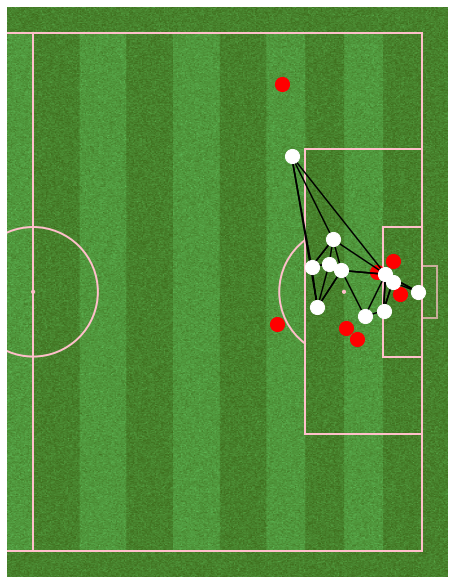

In [17]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='grass', line_color='pink', figsize=(13.5, 8), stripe=True,
              constrained_layout=True, tight_layout=False, view='half', goal_type='box')
fig, ax = pitch.draw()

plt.scatter(tracking_Real.x, tracking_Real.y, color='white', s=200, zorder=2)
plt.scatter(tracking_Liverpool.x, tracking_Liverpool.y, color='red', s=200)

for i in tess_Real.simplices:
        plt.plot(points_Real[i, 0], points_Real[i, 1], 'black', zorder = 1)

In [18]:
points_Liverpool = tracking_Liverpool[['x', 'y']].values
tess_Liverpool = Delaunay(tracking_Liverpool[['x', 'y']])

In [19]:
X = tracking_3.x
Y = tracking_3.y
Team = tracking_3.Team
Liverpool, Real = pitch.voronoi(X, Y, Team)

C:\Users\indra\anaconda3\lib\site-packages\mplsoccer\pitch.py:1596: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  regions = np.array(vor.regions)[regions]
C:\Users\indra\anaconda3\lib\site-packages\mplsoccer\pitch.py:1609: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  region_vertices = np.array(region_vertices)


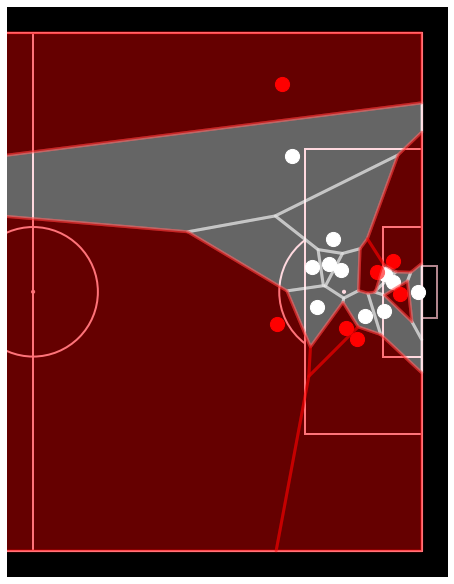

In [20]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='black', line_color='pink', figsize=(13.5, 8),
              constrained_layout=True, tight_layout=False, view='half', goal_type='box')
fig, ax = pitch.draw()

plt.scatter(tracking_Real.x, tracking_Real.y, color='white', s=200)
plt.scatter(tracking_Liverpool.x, tracking_Liverpool.y, color='red', s=200)

vR = pitch.polygon(Real, fc='white', ax=ax, ec='white', lw=3, alpha=0.4)
vL = pitch.polygon(Liverpool, fc='red', ax=ax, ec='red', lw=3, alpha=0.4)

### Convex Hulls of player passes

In [21]:
events=sb.events(match_id=18245)
events

credentials were not supplied. open data access only


,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 41212, 'lineup': [{'player': {'i...",Real Madrid,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Liverpool,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Real Madrid,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Real Madrid,00:42:21.211,Offside,NaN
3493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Real Madrid,00:48:31.725,Half End,NaN
3494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:48:31.725,Half End,NaN
3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:48:02.893,Half End,NaN


In [22]:
E = events[['minute', 'second', 'team', 'location', 'type', 'player']]
E

,minute,second,team,location,type,player
0,0,0,Real Madrid,NaN,Starting XI,NaN
1,0,0,Liverpool,NaN,Starting XI,NaN
2,0,0,Real Madrid,NaN,Half Start,NaN
3,0,0,Liverpool,NaN,Half Start,NaN
4,45,0,Liverpool,NaN,Half Start,NaN
...,...,...,...,...,...,...
3492,42,21,Real Madrid,"[114.8, 41.4]",Offside,Karim Benzema
3493,48,31,Real Madrid,NaN,Half End,NaN
3494,48,31,Liverpool,NaN,Half End,NaN
3495,93,2,Liverpool,NaN,Half End,NaN


In [23]:
E.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Ball Recovery', 'Pressure', 'Clearance', 'Foul Won',
       'Foul Committed', 'Miscontrol', 'Dispossessed', 'Duel',
       'Dribbled Past', 'Dribble', 'Block', 'Shot', 'Goal Keeper',
       'Interception', 'Error', '50/50', 'Injury Stoppage',
       'Substitution', 'Tactical Shift', 'Offside', 'Half End'],
      dtype=object)

In [24]:
E_Real = E[E['team'] == 'Real Madrid']
E_Real.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Ball Recovery', 'Pressure', 'Clearance', 'Foul Won',
       'Foul Committed', 'Miscontrol', 'Dispossessed', 'Duel',
       'Dribbled Past', 'Dribble', 'Block', 'Shot', 'Goal Keeper',
       'Interception', 'Error', '50/50', 'Injury Stoppage',
       'Substitution', 'Tactical Shift', 'Offside', 'Half End'],
      dtype=object)

In [25]:
players_Real = E_Real.player.unique()
players_Real = players_Real[1:]
players_Real

array(['Raphaël Varane', 'Luka Modrić', 'Daniel Carvajal Ramos',
       'Carlos Henrique Casimiro', 'Sergio Ramos García',
       'Marcelo Vieira da Silva Júnior', 'Toni Kroos',
       'Cristiano Ronaldo dos Santos Aveiro', 'Karim Benzema',
       'Keylor Navas Gamboa', 'Francisco Román Alarcón Suárez',
       'José Ignacio Fernández Iglesias', 'Gareth Frank Bale',
       'Marco Asensio Willemsen'], dtype=object)

In [26]:
players_Real = players_Real[:11]
players_Real

array(['Raphaël Varane', 'Luka Modrić', 'Daniel Carvajal Ramos',
       'Carlos Henrique Casimiro', 'Sergio Ramos García',
       'Marcelo Vieira da Silva Júnior', 'Toni Kroos',
       'Cristiano Ronaldo dos Santos Aveiro', 'Karim Benzema',
       'Keylor Navas Gamboa', 'Francisco Román Alarcón Suárez'],
      dtype=object)

In [27]:
E1 = E_Real[(E_Real['player'] == 'Luka Modrić') & (E_Real['type'] == 'Pass')].reset_index()
E1

,index,minute,second,team,location,type,player
0,9,0,10,Real Madrid,"[35.3, 75.4]",Pass,Luka Modrić
1,35,1,51,Real Madrid,"[98.0, 30.9]",Pass,Luka Modrić
2,130,9,45,Real Madrid,"[56.0, 54.0]",Pass,Luka Modrić
3,133,9,52,Real Madrid,"[62.6, 61.9]",Pass,Luka Modrić
4,141,10,53,Real Madrid,"[52.0, 59.1]",Pass,Luka Modrić
...,...,...,...,...,...,...,...
67,977,85,40,Real Madrid,"[116.4, 77.0]",Pass,Luka Modrić
68,987,86,15,Real Madrid,"[50.4, 48.2]",Pass,Luka Modrić
69,1021,90,21,Real Madrid,"[19.1, 75.7]",Pass,Luka Modrić
70,1027,91,45,Real Madrid,"[90.3, 9.5]",Pass,Luka Modrić


In [28]:
pass_loc_Real = E1['location']
pass_loc_Real = pd.DataFrame(pass_loc_Real.to_list(), columns=['x', 'y'])
E1['x'] = pass_loc_Real['x']
E1['y'] = pass_loc_Real['y']
del E1['location']
E1

,index,minute,second,team,type,player,x,y
0,9,0,10,Real Madrid,Pass,Luka Modrić,35.3,75.4
1,35,1,51,Real Madrid,Pass,Luka Modrić,98.0,30.9
2,130,9,45,Real Madrid,Pass,Luka Modrić,56.0,54.0
3,133,9,52,Real Madrid,Pass,Luka Modrić,62.6,61.9
4,141,10,53,Real Madrid,Pass,Luka Modrić,52.0,59.1
...,...,...,...,...,...,...,...,...
67,977,85,40,Real Madrid,Pass,Luka Modrić,116.4,77.0
68,987,86,15,Real Madrid,Pass,Luka Modrić,50.4,48.2
69,1021,90,21,Real Madrid,Pass,Luka Modrić,19.1,75.7
70,1027,91,45,Real Madrid,Pass,Luka Modrić,90.3,9.5


### Discard the outliers using *Inter Quartile Range*

In [29]:
Q1 = np.percentile(E1[['x', 'y']], 25, 
                   interpolation = 'midpoint')
Q3 = np.percentile(E1[['x', 'y']], 75, 
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

upper = np.where(E1[['x', 'y']] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(E1[['x', 'y']] <= (Q1-1.5*IQR))

E1.drop(upper[0], inplace = True)
E1.drop(lower[0], inplace = True)

In [30]:
E1 = E1.reset_index()
E1

,level_0,index,minute,second,team,type,player,x,y
0,0,9,0,10,Real Madrid,Pass,Luka Modrić,35.3,75.4
1,1,35,1,51,Real Madrid,Pass,Luka Modrić,98.0,30.9
2,2,130,9,45,Real Madrid,Pass,Luka Modrić,56.0,54.0
3,3,133,9,52,Real Madrid,Pass,Luka Modrić,62.6,61.9
4,4,141,10,53,Real Madrid,Pass,Luka Modrić,52.0,59.1
...,...,...,...,...,...,...,...,...,...
63,65,947,80,45,Real Madrid,Pass,Luka Modrić,45.8,70.8
64,66,950,80,52,Real Madrid,Pass,Luka Modrić,48.8,65.8
65,68,987,86,15,Real Madrid,Pass,Luka Modrić,50.4,48.2
66,69,1021,90,21,Real Madrid,Pass,Luka Modrić,19.1,75.7


In [31]:
points_Real = E1[['x', 'y']].values

In [32]:
convex_hull_Real = ConvexHull(E1[['x', 'y']])
convex_hull_Real

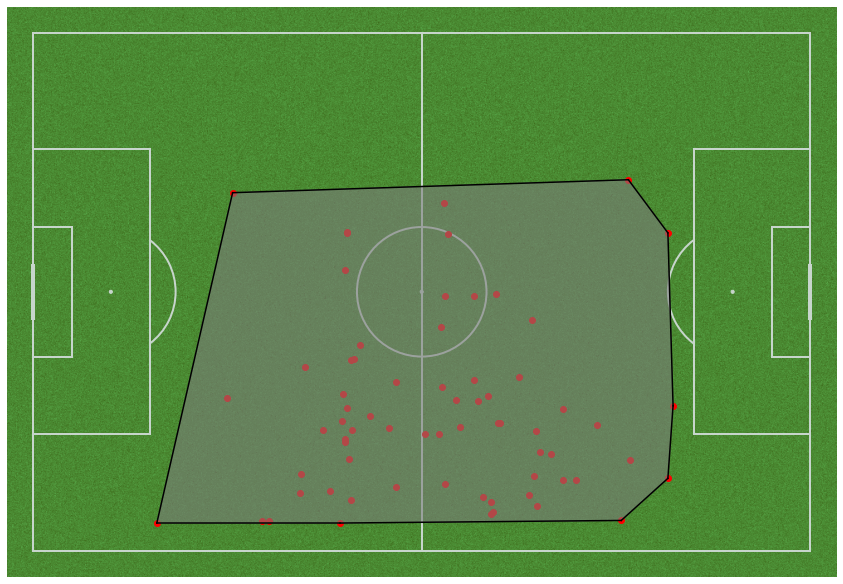

In [33]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='grass', line_color='#c7d5cc', figsize=(13.5, 8),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

plt.scatter(E1.x, E1.y, color='red')

for i in convex_hull_Real.simplices:
    plt.plot(points_Real[i, 0], points_Real[i, 1], 'black')
    plt.fill(points_Real[convex_hull_Real.vertices, 0], points_Real[convex_hull_Real.vertices, 1], c='grey', alpha=0.1)
    

In [34]:
ccodes = ['#FAEBD7', '#66CDAA', '#E3CF57', '#8A2BE2', '#EE3B3B', '#66CD00', '#DC143C', '#FFB90F', '#A9A9A9', '#B23AEE', '#CD1076',
         '#8B6914', '#BFEFFF', '#EED2EE', '#C6E2FF', '#C67171']

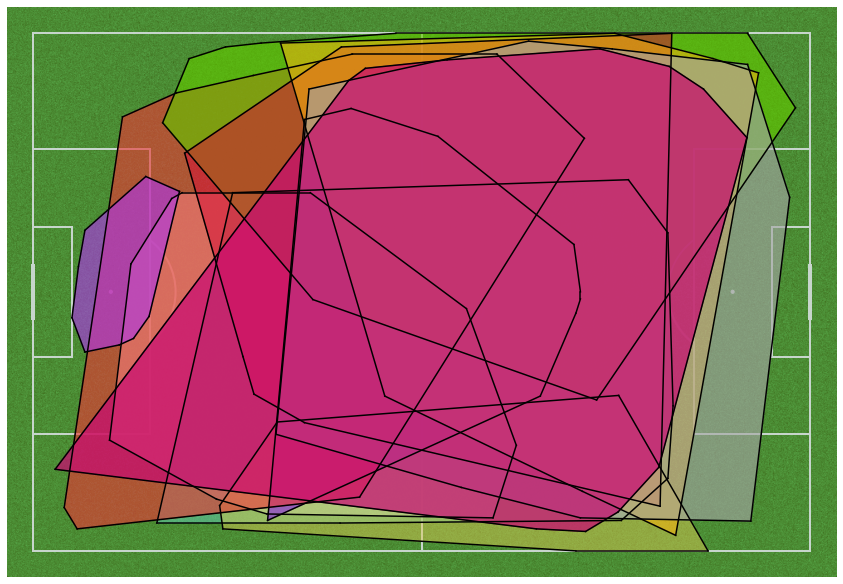

In [35]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='grass', line_color='#c7d5cc', figsize=(13.5, 8),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

for k in range(len(players_Real)):
    p = players_Real[k]
    Ep = E_Real[(E_Real['player'] == p) & (E_Real['type'] == 'Pass')].reset_index()
    
    pass_loc_Real = Ep['location']
    pass_loc_Real = pd.DataFrame(pass_loc_Real.to_list(), columns=['x', 'y'])
    Ep['x'] = pass_loc_Real['x']
    Ep['y'] = pass_loc_Real['y']
    del Ep['location']
    
    Q1 = np.percentile(Ep[['x', 'y']], 25,  interpolation = 'midpoint')
    Q3 = np.percentile(Ep[['x', 'y']], 75,  interpolation = 'midpoint')
    iq = Q3 - Q1
    u_bound = np.where(Ep[['x', 'y']] >= (Q3+1.5*iq))
    l_bound = np.where(Ep[['x', 'y']] <= (Q1-1.5*iq))
    Ep.drop(u_bound[0], inplace = True)
    Ep.drop(l_bound[0], inplace = True)
    Ep = Ep.reset_index()
    
    points_Real = Ep[['x', 'y']].values
    
    try:
        convex_hull_Real = ConvexHull(Ep[['x', 'y']])
    except:
        pass
    
    try:
        for i in convex_hull_Real.simplices:
            plt.plot(points_Real[i, 0], points_Real[i, 1], 'black')
            plt.fill(points_Real[convex_hull_Real.vertices, 0], points_Real[convex_hull_Real.vertices, 1], c=ccodes[k], alpha=0.1)
    except:
        pass

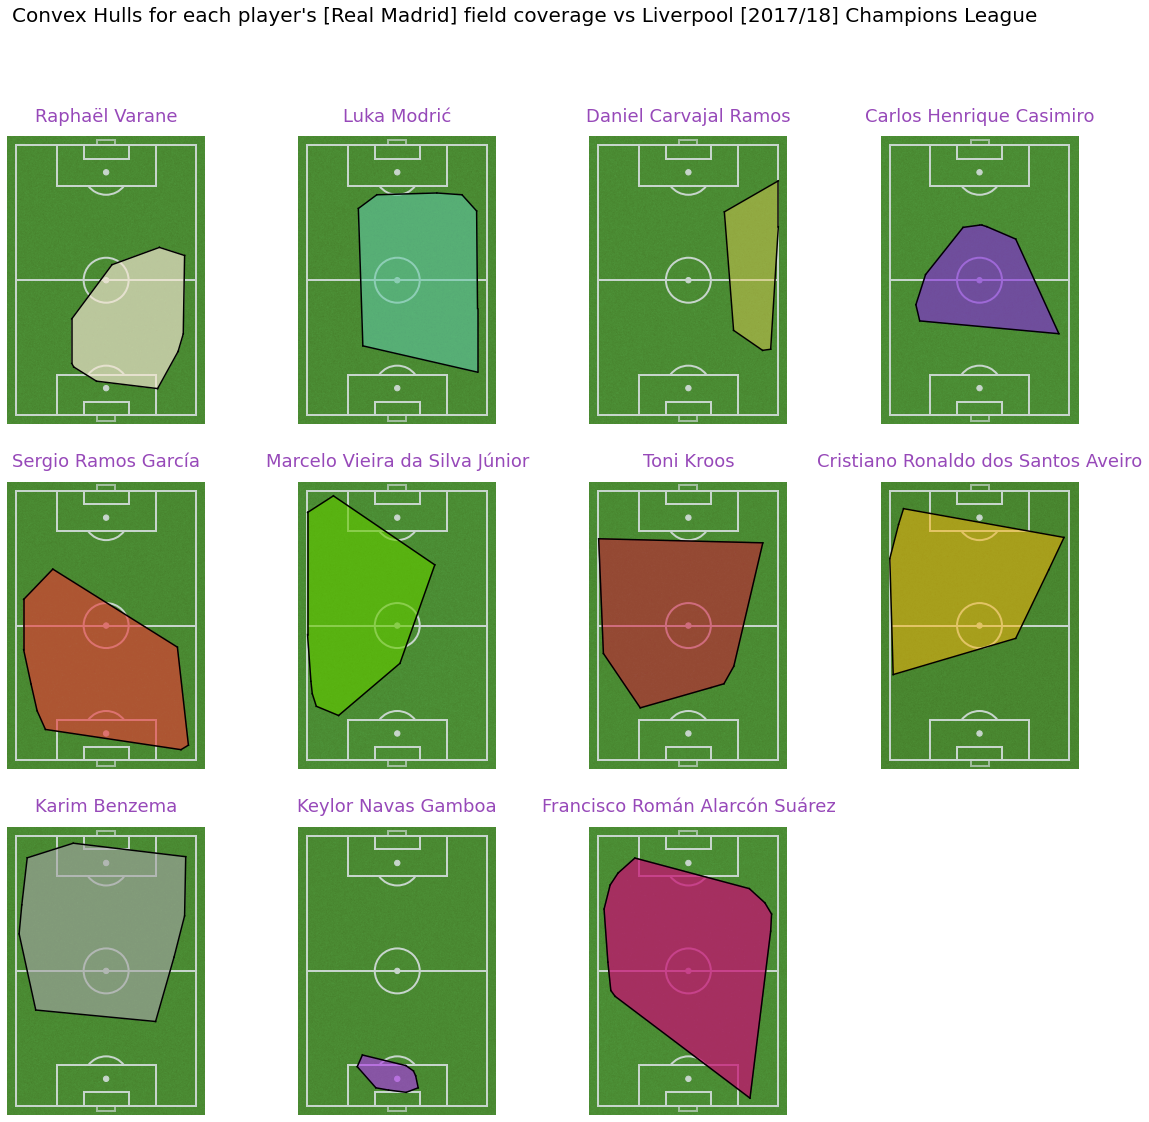

In [36]:
fig, axes = plt.subplots(3, 4, figsize=(20, 18))
axes = axes.ravel()
#axes = axes.invert_yaxis()
#plt.gca().invert_yaxis()

for idx, p in enumerate(players_Real):
    
    pitch = Pitch(pitch_type='statsbomb', orientation='vertical', spot_scale=0.01, goal_type='box',
              pitch_color='grass', line_color='#c7d5cc', figsize=(10, 16.5),
              constrained_layout=True, tight_layout=False)
    w=axes[idx].invert_yaxis()
    pitch.draw(axes[idx])
    xmin, xmax, ymin, ymax = pitch.extent
    
    axes[idx].xaxis.set_ticks([xmin, xmax])
    axes[idx].yaxis.set_ticks([ymin, ymax])
    axes[idx].tick_params(labelsize=15)
    axes[idx].set_title(p, fontsize=18, c='#9749b9', pad=15)
    
    Ep = E_Real[(E_Real['player'] == p) & (E_Real['type'] == 'Pass')].reset_index()
    
    pass_loc_Real = Ep['location']
    pass_loc_Real = pd.DataFrame(pass_loc_Real.to_list(), columns=['x', 'y'])
    Ep['y'] = pass_loc_Real['x']
    Ep['x'] = pass_loc_Real['y']
    del Ep['location']
    
    Q1 = np.percentile(Ep[['x', 'y']], 25,  interpolation = 'midpoint')
    Q3 = np.percentile(Ep[['x', 'y']], 75,  interpolation = 'midpoint')
    iq = Q3 - Q1
    u_bound = np.where(Ep[['x', 'y']] >= (Q3+1.5*iq))
    l_bound = np.where(Ep[['x', 'y']] <= (Q1-1.5*iq))
    Ep.drop(u_bound[0], inplace = True)
    Ep.drop(l_bound[0], inplace = True)
    Ep = Ep.reset_index()
    
    points_Real = Ep[['x', 'y']].values
    
    try:
        convex_hull_Real = ConvexHull(Ep[['x', 'y']])
    except:
        pass
    
    try:
        for i in convex_hull_Real.simplices:
            axes[idx].plot(points_Real[i, 0], points_Real[i, 1], 'black')
            axes[idx].fill(points_Real[convex_hull_Real.vertices, 0], points_Real[convex_hull_Real.vertices, 1], c=ccodes[idx], alpha=0.1)
    except:
        pass
    
title = fig.suptitle("Convex Hulls for each player's [Real Madrid] field coverage vs Liverpool [2017/18] Champions League", fontsize=20)
axes[-1].remove()
#fig.tight_layout()

In [37]:
E_Liverpool = E[E['team'] == 'Liverpool']
E_Liverpool

,minute,second,team,location,type,player
1,0,0,Liverpool,NaN,Starting XI,NaN
3,0,0,Liverpool,NaN,Half Start,NaN
4,45,0,Liverpool,NaN,Half Start,NaN
6,0,0,Liverpool,"[60.0, 40.0]",Pass,James Philip Milner
7,0,3,Liverpool,"[35.0, 40.8]",Pass,Dejan Lovren
...,...,...,...,...,...,...
3484,29,39,Liverpool,NaN,Substitution,Mohamed Salah
3487,82,27,Liverpool,NaN,Substitution,James Philip Milner
3489,31,41,Liverpool,NaN,Tactical Shift,NaN
3494,48,31,Liverpool,NaN,Half End,NaN


In [38]:
players_Liverpool = E_Liverpool.player.unique()
players_Liverpool

array([nan, 'James Philip Milner', 'Dejan Lovren',
       'Jordan Brian Henderson', 'Sadio Mané',
       'Roberto Firmino Barbosa de Oliveira', 'Mohamed Salah',
       'Trent Alexander-Arnold', 'Virgil van Dijk', 'Andrew Robertson',
       'Georginio Wijnaldum', 'Loris Karius', 'Adam David Lallana',
       'Emre Can'], dtype=object)

In [39]:
players_Liverpool = players_Liverpool[1:12]
players_Liverpool

array(['James Philip Milner', 'Dejan Lovren', 'Jordan Brian Henderson',
       'Sadio Mané', 'Roberto Firmino Barbosa de Oliveira',
       'Mohamed Salah', 'Trent Alexander-Arnold', 'Virgil van Dijk',
       'Andrew Robertson', 'Georginio Wijnaldum', 'Loris Karius'],
      dtype=object)

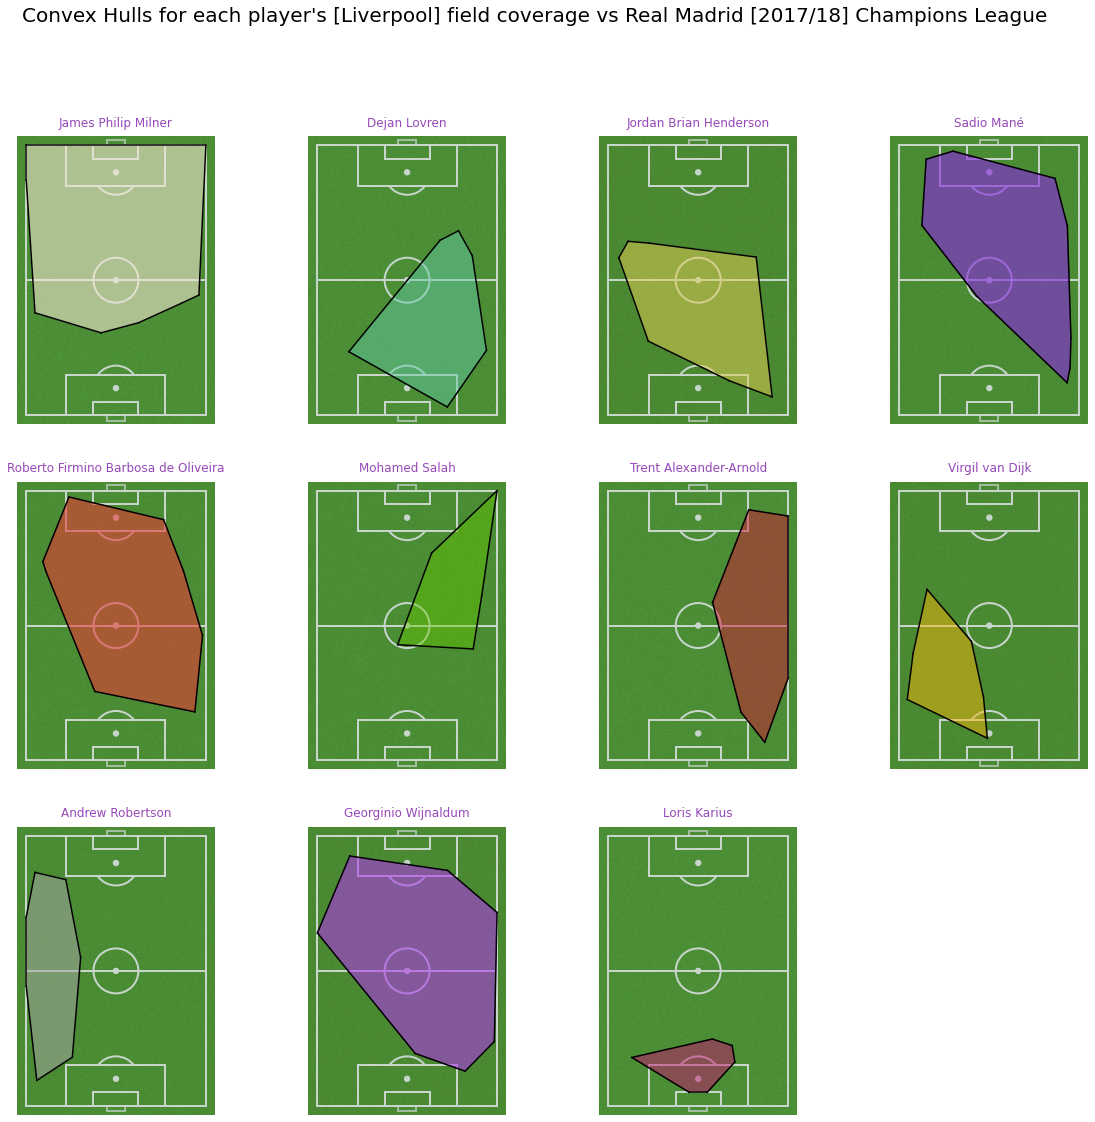

In [44]:
fig, axes = plt.subplots(3, 4, figsize=(20, 18))
axes = axes.ravel()
#axes = axes.invert_yaxis()
#plt.gca().invert_yaxis()

for idx, p in enumerate(players_Liverpool):
    
    pitch = Pitch(pitch_type='statsbomb', orientation='vertical', spot_scale=0.01, goal_type='box',
              pitch_color='grass', line_color='#c7d5cc', figsize=(10, 16.5),
              constrained_layout=True, tight_layout=False)
    w=axes[idx].invert_yaxis()
    pitch.draw(axes[idx])
    xmin, xmax, ymin, ymax = pitch.extent
    
    axes[idx].xaxis.set_ticks([xmin, xmax])
    axes[idx].yaxis.set_ticks([ymin, ymax])
    axes[idx].tick_params(labelsize=15)
    axes[idx].set_title(p, fontsize=12, c='#9749b9', pad=10)
    
    El = E_Liverpool[(E_Liverpool['player'] == p) & (E_Liverpool['type'] == 'Pass')].reset_index()
    
    pass_loc_Liverpool = El['location']
    pass_loc_Liverpool = pd.DataFrame(pass_loc_Liverpool.to_list(), columns=['x', 'y'])
    El['y'] = pass_loc_Liverpool['x']
    El['x'] = pass_loc_Liverpool['y']
    del El['location']
    
    Q1 = np.percentile(El[['x', 'y']], 25,  interpolation = 'midpoint')
    Q3 = np.percentile(El[['x', 'y']], 75,  interpolation = 'midpoint')
    iq = Q3 - Q1
    u_bound = np.where(El[['x', 'y']] >= (Q3+1.5*iq))
    l_bound = np.where(El[['x', 'y']] <= (Q1-1.5*iq))
    El.drop(u_bound[0], inplace = True)
    El.drop(l_bound[0], inplace = True)
    El = El.reset_index()
    
    points_Liverpool = El[['x', 'y']].values
    
    try:
        convex_hull_Liverpool = ConvexHull(El[['x', 'y']])
    except:
        pass
    
    try:
        for i in convex_hull_Liverpool.simplices:
            axes[idx].plot(points_Liverpool[i, 0], points_Liverpool[i, 1], 'black')
            axes[idx].fill(points_Liverpool[convex_hull_Liverpool.vertices, 0], points_Liverpool[convex_hull_Liverpool.vertices, 1], c=ccodes[idx], alpha=0.1)
    except:
        pass
    
title = fig.suptitle("Convex Hulls for each player's [Liverpool] field coverage vs Real Madrid [2017/18] Champions League", fontsize=20)
axes[-1].remove()